In [124]:
import math

import qiskit as q
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline

In [139]:
state_vector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_simulator = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    result = q.execute(circuit, backend=state_vector_simulator).result()
    statevec = result.get_statevector()

    nr_qubits = circuit.qregs[0].size
    nr_cbits = circuit.cregs[0].size
    print(nr_qubits, nr_cbits)
    circuit.measure(list(range(nr_qubits)), list(range(nr_cbits)))
    qasm_result = q.execute(circuit, backend=qasm_simulator, shots=2**12).result()
    counts = qasm_result.get_counts()

    return statevec, counts

     ┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1 
2 2


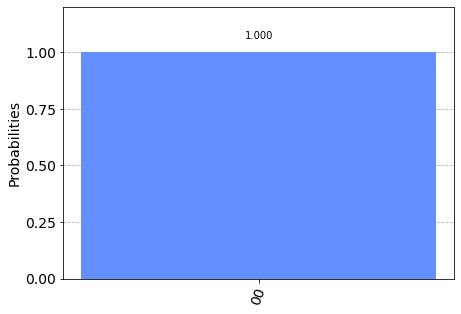

In [126]:
circuit = q.QuantumCircuit(2, 2)
circuit.measure([0, 1], [0, 1])
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
plot_histogram([counts])

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               
2 2


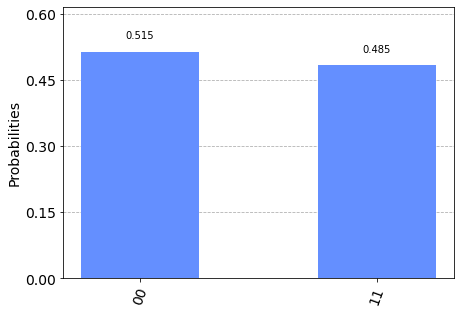

In [127]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
plot_histogram([counts])

3 3


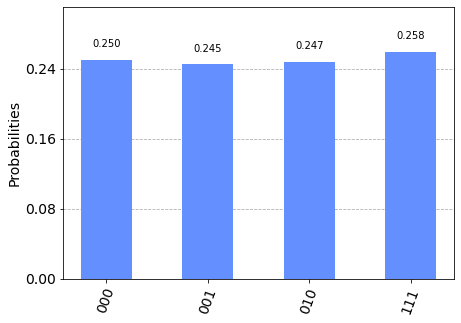

In [153]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
# 0, 0, 0
# 0, 1, 0
# 1, 0, 0
# 1, 1, 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
plot_histogram([counts])

3 3


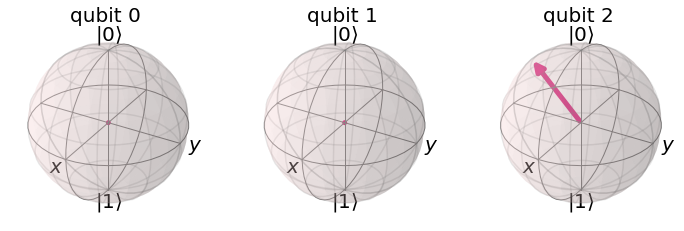

In [146]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
# circuit.h(1)
circuit.cx(0, 1)
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
# plot_histogram([counts])